<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

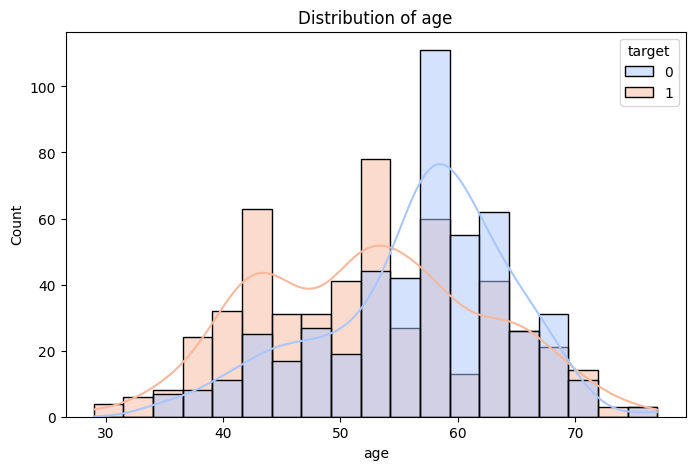

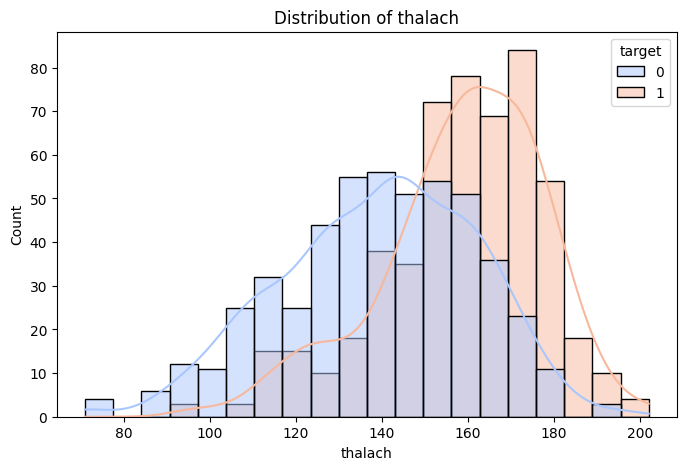

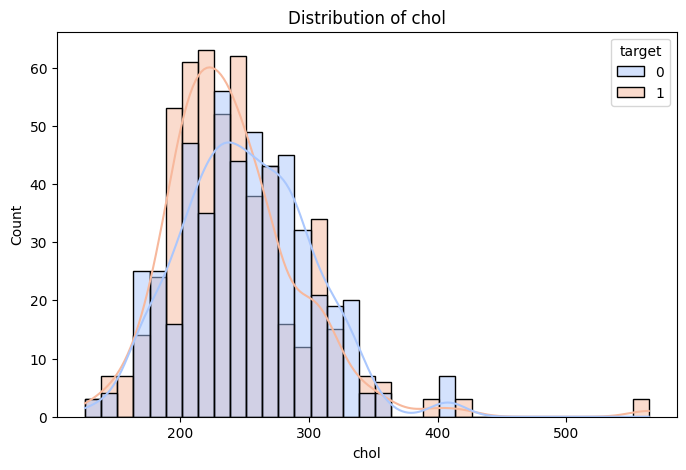

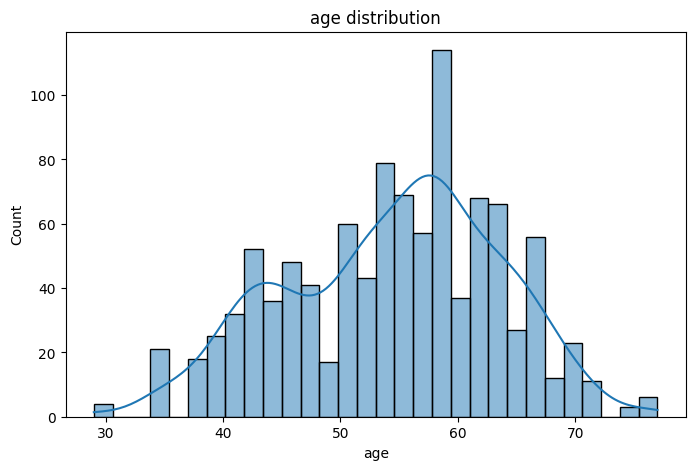

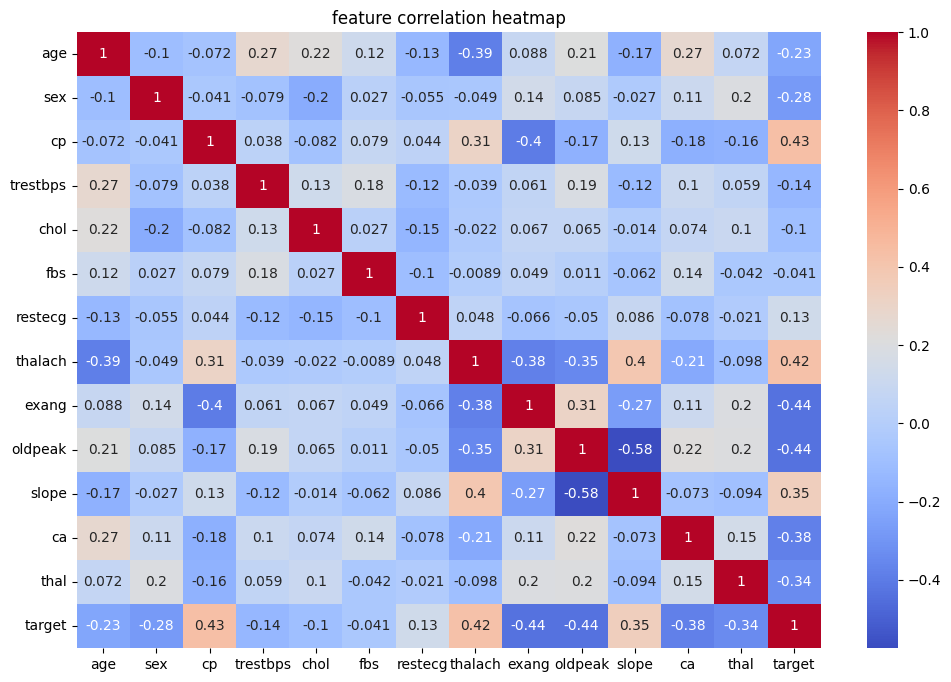

accuracy: 0.9853658536585366


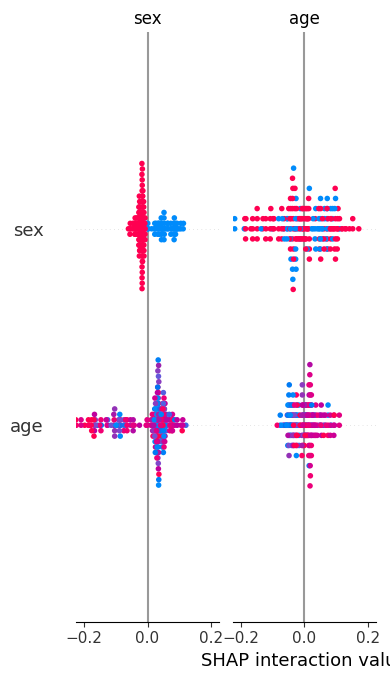

Model Accuracy:0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



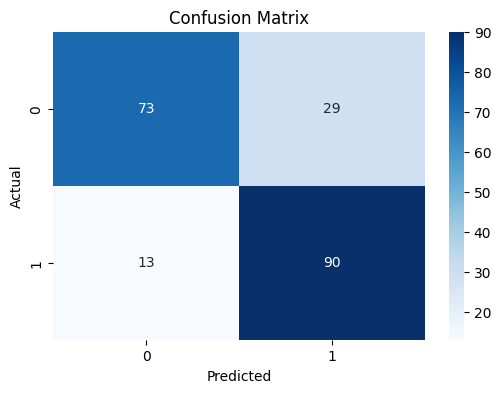

Best Parameters: {'C': 1, 'solver': 'liblinear'}


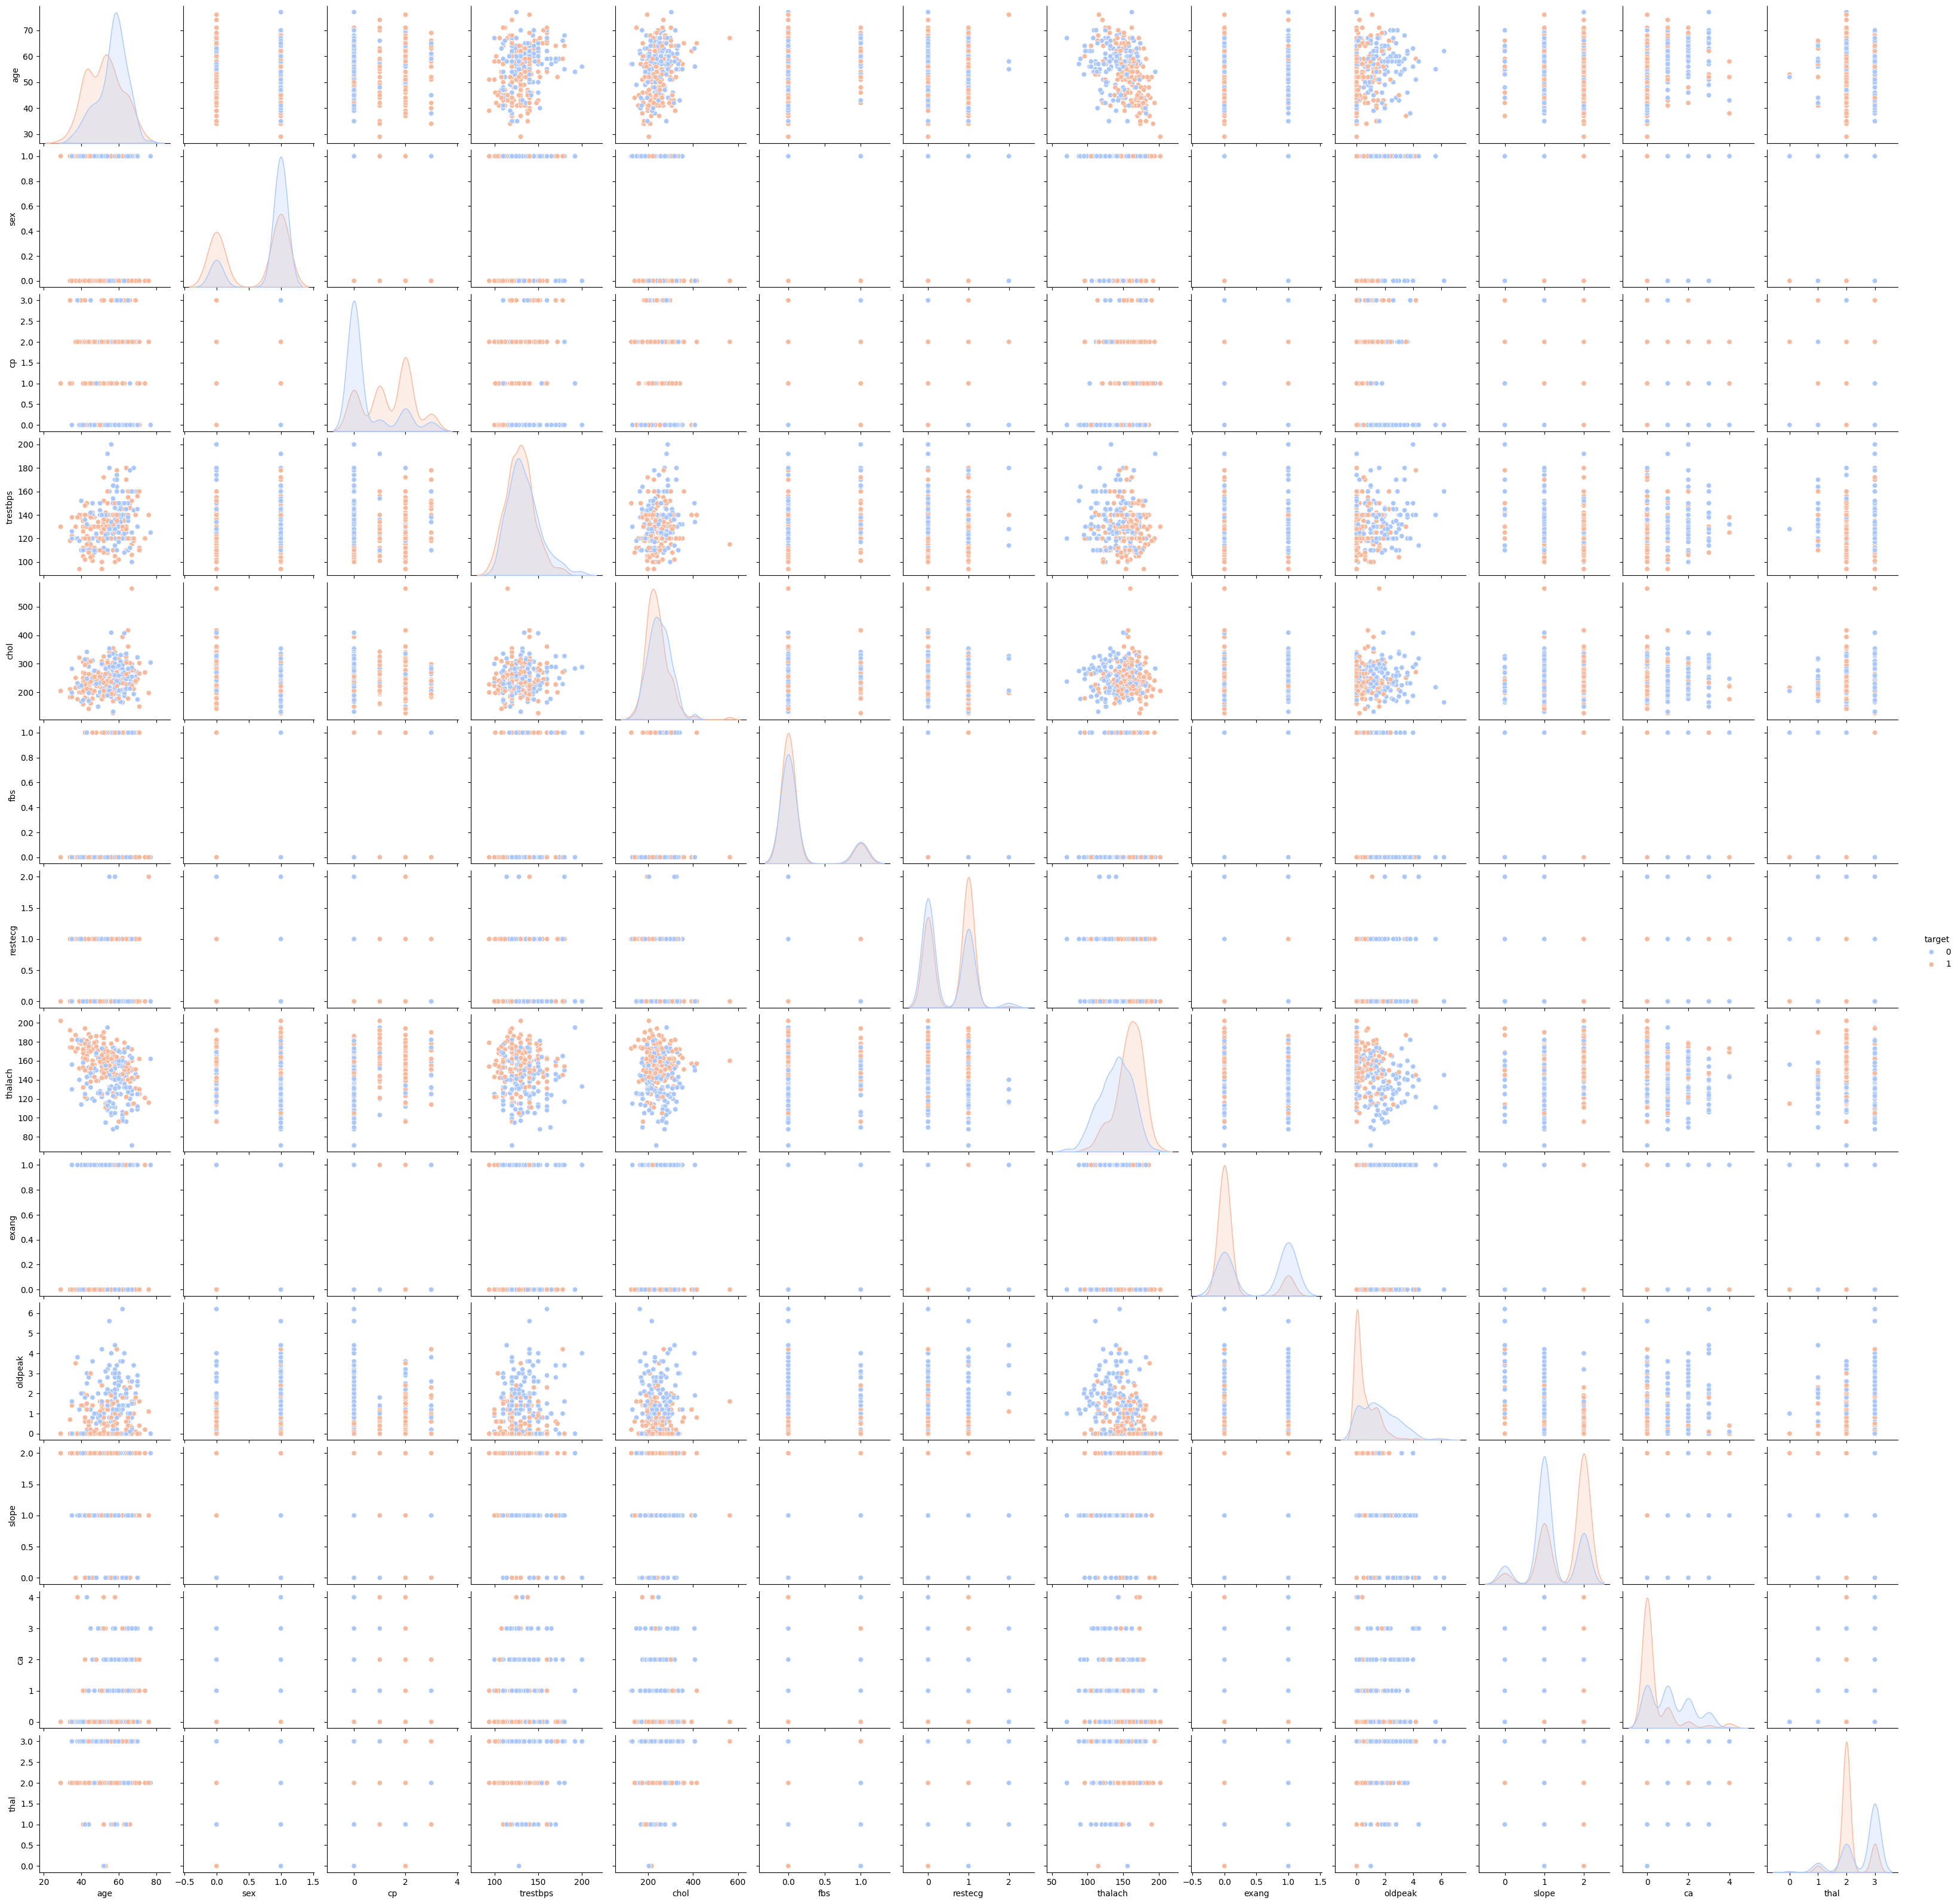

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8361 - loss: 563.6978 - val_accuracy: 0.7805 - val_loss: 741.9788
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8363 - loss: 546.5511 - val_accuracy: 0.7854 - val_loss: 692.8431
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 442.8095 - val_accuracy: 0.7902 - val_loss: 645.3598
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 439.1839 - val_accuracy: 0.7951 - val_loss: 598.0238
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 372.0780 - val_accuracy: 0.8049 - val_loss: 552.9194
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 382.8472 - val_accuracy: 0.8098 - val_loss: 513.1942
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8379 - loss: 250.0133 - val_accuracy: 0.8098 - val_loss: 471.1208
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 232.0165 - va

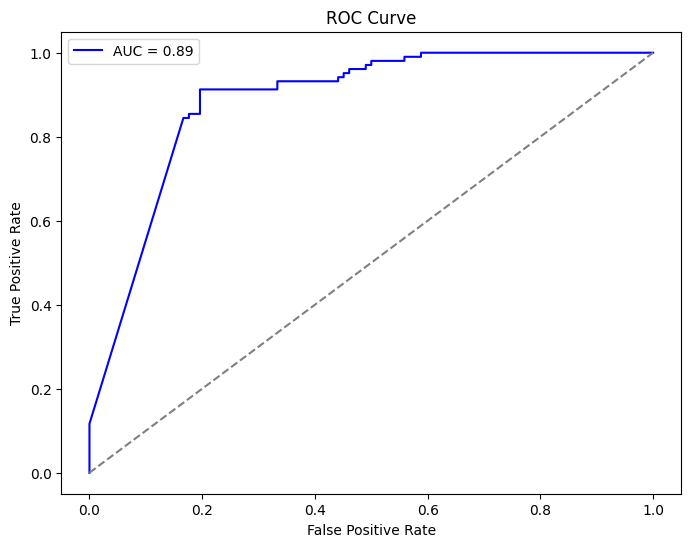

Shape mismatch: 13 importances vs 11 features


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import load_model


#Basic data exploration
df=pd.read_csv(r"c:\users\penag\documents\jupyter Notebooks\heart.csv")
df.head()
print(df.info())
print(df.describe())
print(df.isnull().sum())
df.fillna(df.mean(),inplace=True)
print("Column Data Types:")
print(df.dtypes)


print("\nFirst 5 Rows of DataFrame:")
print(df.head())


print("\nUnique values in target column:")
print(df['target'].unique())


for col in ['age', 'thalach', 'chol']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df, x=col, kde=True, hue='target', palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.show()
#Data visualization
plt.figure(figsize=(8,5))
sns.histplot(df['age'],bins=30,kde=True)
plt.title("age distribution")
plt.show()
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("feature correlation heatmap")
plt.show()
#splitting data into features (x) and target (y)
x=df.drop(columns=['target'])
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
#SHAP
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)
shap.summary_plot(shap_values.values, x_test)
#feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#model training
model=LogisticRegression()
model.fit(x_train,y_train)
#model prediction
y_pred=model.predict(x_test)
#evaluation
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
#confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
#find correlated features
corr_matrix=df.corr()
high_corr_features=corr_matrix[abs(corr_matrix["target"])>0.1]["target"].index.tolist()
df_selected=df[high_corr_features]
x=df_selected.drop(columns=['target'])
y=df_selected['target']
param_grid={'C':[0.01,0.1,1,10,100],'solver':['liblinear','lbfgs']}
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(x_train,y_train)
best_model=grid.best_estimator_
print("Best Parameters:",grid.best_params_)
#more visualization
sns.pairplot(df,hue="target",palette="coolwarm")
plt.show()
model=Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(16,activation='relu'),
    
    Dense(8,activation='relu'),
    
    Dense(1,activation='sigmoid')
])

model=load_model("heart_disease_model.keras")
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,batch_size=10,validation_data=(x_test,y_test))
dl_loss, dl_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Deep Learning Model Accuracy: {dl_accuracy:.2f}")

# ROC Curve & AUC Score for Deep Learning Model
y_prob = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance (RandomForest Model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

importances = rf_model.feature_importances_
feature_names = x.columns
sorted_idx = np.argsort(importances)[::-1]
if len(importances) == len(feature_names):
    sorted_idx = np.argsort(importances)[::-1]  
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="coolwarm")
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance (RandomForest Model)")
    plt.show()
else:
    print(f"Shape mismatch: {len(importances)} importances vs {len(feature_names)} features")



In [4]:
import tensorflow as tf

@tf.function(reduce_retracing=True)  
def my_function(inputs: tf.Tensor):
    return tf.math.square(inputs)

# Example
x = tf.constant([1.0, 2.0, 3.0])
print(my_function(x))


tf.Tensor([1. 4. 9.], shape=(3,), dtype=float32)
